In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
from collections import Counter
import regex as re

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

In [3]:
from IPython.display import display_html

In [4]:
def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(
        html_str.replace('table','table style="display:inline"'), 
        raw=True
    )

## Data

In [5]:
df = pd.read_csv('Transjakarta.csv')

Dataset ini beberisi data terkait demografis penumpang Bus Transjakarta, dengan data terkait data penumpang dikaitkan dengan paycard penumpang, rute yang diambil, halte tempat naik dan turun Bus, serta biaya bus tiap naik-turun Bus. Ada 21 kolom di dalam 'Transjakarta.csv', berikut maksud tiap kolom:
- payCardID: ID penumpang (bayar)
- payCardBank: Bank penumpang (bayar)
- payCardName: Nama penumpang
- payCardSex: Kelamin penumpang
- payCardBirthDate: tanggal lahir penumpang
- corridorID: ID Rute
- corridorName: Nama Rute
- direction: arah Bus
- tapInStops: ID Halte naik
- tapInStopsName: Nama Halte naik
- tapInStopsLat: Lattitude Halte naik
- tapInStopsLon: Longitude Halte naik
- stopStartSeq: Urutan Halte naik (Pada rute Bus)
- tapInTime: Waktu naik Bus
- tapOutStops: ID Halte turun
- tapOutStopsName: Nama Halte turun
- tapOutStopsLat: Lattitude Halte turun
- tapOutStopsLon: Longitude Halte turun
- stopEndSeq: Urutan Halte turun (Pada rute Bus)
- tapOutTime: Waktu turun Bus
- payAmount: biaya Bus

Berikut 5 baris teratas dan 5 baris terbawah

In [6]:
display(df.head(),df.tail())

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0
37899,FMZZ963S4B68ZP,501862539795,flazz,drg. Leo Najmudin,F,1985,13,Ciledug - Tendean,0.0,P00001,Adam Malik,-6.236466,106.74786,2,2023-04-12 21:08:12,P00106,Kebayoran Lama,-6.238340,106.77752,7.0,2023-04-12 21:34:53,3500.0


### Data Understanding & Cleaning

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset Transjakarta.

In [7]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (37900, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-nul

In [8]:
display(df.describe(), df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [9]:
pd.set_option('display.max_colwidth', 0)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel_Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel_Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

In [10]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1257
corridorName        1930
direction           0   
tapInStops          1213
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

Secara umum, kita bisa melihat bahwa:
* dataset Transjakarta memiliki 21 kolom dan 37900 baris.
* Kolom yang memiliki data kosong berada pada kolom: `corridorID`, `corridorName`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount`.
* kolom `transID` berisikan id unik untuk tiap penumpang, sehingga tidak relevan dalam analisis dan bisa dihapus saja. 
* kolom dengan suffix `Lat` dan `Lon` merupakan geodata lokasi halte naik dan turun: *Lattitude* dan *Longitude*.
* kolom `payAmount` yang berharga 20000,00 harusnya 2000,00 berlebih 1 digit (reguler: 3.500, ekonomis: 2.000).
* kolom `corridorID` memiliki jumlah value unique sebanyak 221 tetapi `corridorName` hanya memiliki 216, seharusnya keduanya berjumlah sama berdasarkan pengamatan standar suffix `ID` terkait dengan `Name` untuk data `corridor`.
* pengamatan yang sama juga dapat dilihat pada data `paycard` dengan `ID` sebanyak 2000 tetapi `Name` hanya sebanyak 1993.
* kolom `paycardID` berbentuk numerik, seharusnya dalam bentuk object.
* kolom `payCardBirthDate` merupakan tahun lahir usia, sekarang dalam numerik, tapi dapat dipertimbangkan untuk diubah ke datetime.
* kolom dengan suffix `Time` semua merupakan object, dapat diubah ke datetime untuk pertimbangan.

In [11]:
df.duplicated().sum()

0

#### Missing Values

In [12]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

transID             0.000000
payCardID           0.000000
payCardBank         0.000000
payCardName         0.000000
payCardSex          0.000000
payCardBirthDate    0.000000
corridorID          3.316623
corridorName        5.092348
direction           0.000000
tapInStops          3.200528
tapInStopsName      0.000000
tapInStopsLat       0.000000
tapInStopsLon       0.000000
stopStartSeq        0.000000
tapInTime           0.000000
tapOutStops         6.039578
tapOutStopsName     3.546174
tapOutStopsLat      3.546174
tapOutStopsLon      3.546174
stopEndSeq          3.546174
tapOutTime          3.546174
payAmount           2.656992
dtype: float64

<Axes: >

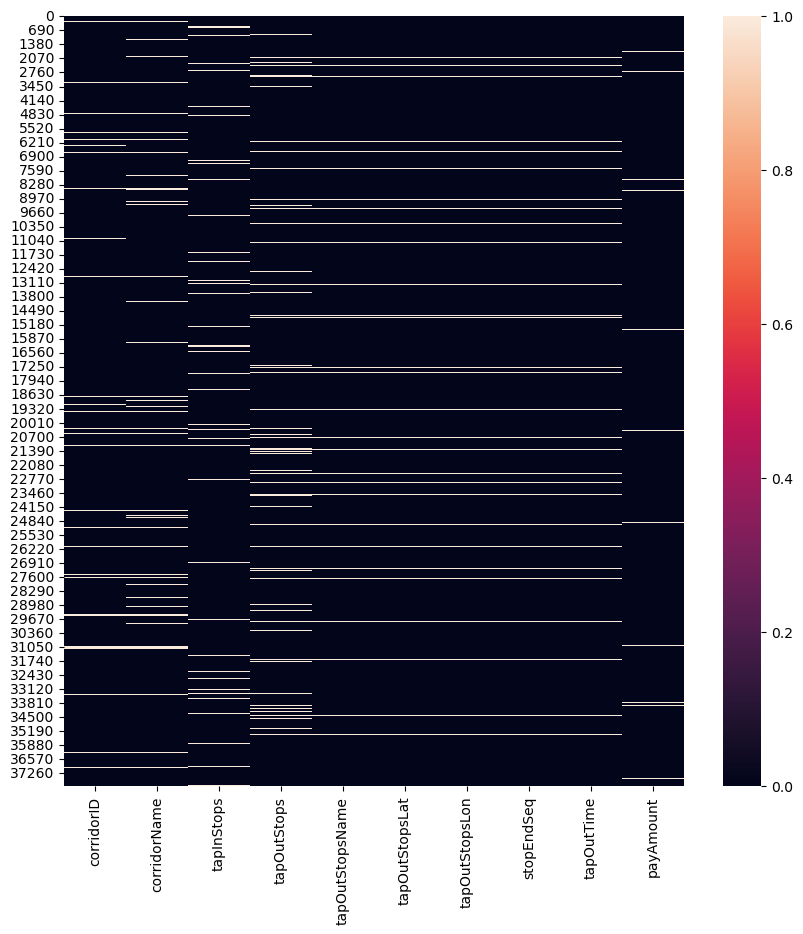

In [13]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['corridorID', 'corridorName', 'tapInStops', 'tapOutStops', 'tapOutStopsName', 'tapOutStopsLat', 'tapOutStopsLon', 'stopEndSeq', 'tapOutTime', 'payAmount']].isna())

Secara garis besar:
- kolom yang memiliki missing value tidak ada yang melebihi lebih dari 10% data
- kebanyakan kolom dengan missing value berentang sekitar 2.5% ~ 3.5% cukup rendah dari keseluruhan
- terdapat dua outlier dari rentang diatas, yaitu: `corridorName`: 5%, `tapOutStops`: 6%

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*. Cara ini berkemungkinan terlalu bermasalah karena rata-rata missing value sebanyak 3%, jumlah yang dapat dipertimbangkan bisa dihapus.
* kedua, mengisi data yang hilang. Cara ini disarankan bila kolom lain dapat menjadi bahan metode untuk mengisi data missing value pada kolom lain.

pertama ubah kolom `payCardID` ke datatype object dari numerik, karena kolom merupakan ID key bukan penentu harga

In [14]:
df['payCardID'] = df['payCardID'].astype('str')

Melakukan cek pada kolom `payAmount` dan cleaning

In [15]:
df['payCardID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 37900 entries, 0 to 37899
Series name: payCardID
Non-Null Count  Dtype 
--------------  ----- 
37900 non-null  object
dtypes: object(1)
memory usage: 296.2+ KB


In [16]:
df['payAmount'].value_counts()

payAmount
3500.0     18503
0.0        16648
20000.0    1742 
Name: count, dtype: int64

Fix `payAmount` 20.000 ke 2.000, referensi diambil dari https://blog.cove.id/transjakarta-di-jakarta-pusat/
- ditemukan pula harga ditentukan oleh jam operasional, akan digunakan kolom `tapInTime` sebagai penentu pengisian `payAmount` yang missing values


In [17]:
for n in range(df.shape[0]):
    if df.loc[n, 'payAmount'] == 20000:
        df.loc[n, 'payAmount'] = 2000

In [18]:
df['payAmount'].isna().sum()

1007

Pengisin missing value `payAmount` ditentukan oleh `tapOutTime`, memahami kolom `tapInTime` dan `tapOutTime` terlebih dahulu

In [19]:
df['tapInTime'].head()

0    2023-04-03 05:21:44
1    2023-04-03 05:42:44
2    2023-04-03 05:59:06
3    2023-04-03 05:44:51
4    2023-04-03 06:17:35
Name: tapInTime, dtype: object

ubah `tapInTime` dan `tapOutTime` ke datatype datetime, serta `payCardBirthDate` ke int

In [20]:
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])
df['payCardBirthDate'].astype('int')

0        2008
1        1997
2        1992
3        1978
4        1982
         ... 
37895    2004
37896    1974
37897    1976
37898    1976
37899    1985
Name: payCardBirthDate, Length: 37900, dtype: int32

In [21]:
df[['tapInTime', 'tapOutTime', 'payCardBirthDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tapInTime         37900 non-null  datetime64[ns]
 1   tapOutTime        36556 non-null  datetime64[ns]
 2   payCardBirthDate  37900 non-null  int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 888.4 KB


menggunakan `tapInTime` sebagai patokan untuk mengisi missing value pada `payAmount`
- Pukul 05.00 - 07.00 WIB: Rp2.000
- Pukul 07.00 - 24.00 WIB: Rp3.500
- Pukul 24.00 - 05.00 WIB: Rp3.500

In [22]:
for n in range(df.shape[0]):
    if pd.isnull(df.loc[n, 'payAmount']) == True:
        if df.loc[n, 'tapInTime'].hour >= 7 and df.loc[n, 'tapInTime'].hour <= 5:
            df.loc[n, 'payAmount'] = 3500
        else:
            df.loc[n, 'payAmount'] = 2000
    

In [23]:
df['payAmount'].isna().sum()

0

In [24]:
df[['corridorID', 'corridorName']].nunique()

corridorID      221
corridorName    216
dtype: int64

Jumlah unique `corridorID` dan `corridorName` berbeda, meskipun keduanya saling terkait dengan asumsi seharusnya keduanya berjumlah sama

In [25]:
ref_id = df[df['corridorID'].isna() == False]['corridorID'].unique()
ref_name = df[df['corridorName'].isna() == False][['corridorID', 'corridorName']]
list_corridor = []
for n in range(len(ref_id)):
    name = ref_name[ref_name['corridorID']== ref_id[n]]['corridorName'].unique()
    list_corridor.append([ref_id[n], name[0]])

df_corridor = pd.DataFrame(columns=['corridorID', 'corridorName'],
                           data=list_corridor)
df_corridor

,corridorID,corridorName
0,5,Matraman Baru - Ancol
1,6C,Stasiun Tebet - Karet via Patra Kuningan
2,R1A,Pantai Maju - Kota
3,11D,Pulo Gebang - Pulo Gadung 2 via PIK
4,12,Tanjung Priok - Pluit
...,...,...
216,1R,Senen - Tanah Abang
217,7B,Kampung Rambutan - Blok M
218,M5,Matraman Baru - Ancol
219,JAK.99,Term. Pulo Gadung - Lampiri


In [26]:
nm = []
for n in range(df_corridor.shape[0]):
    m = df_corridor.loc[n, 'corridorName']
    q = df_corridor[df_corridor['corridorName'] == m]['corridorID'].unique()
    if len(q) > 1:
        nm.append(f'{m} == ID:| {q[0]}, {q[1]} |')
nm


['Matraman Baru - Ancol == ID:| 5, M5 |',
 'Pinang Ranti - Pluit == ID:| M9, 9 |',
 'Blok M - Kota == ID:| M1, 1 |',
 'Pulo Gadung - Monas == ID:| 2, M2 |',
 'Blok M - Kota == ID:| M1, 1 |',
 'Kalideres - Bundaran HI via Veteran == ID:| M3, 3 |',
 'Pulo Gadung - Monas == ID:| 2, M2 |',
 'Kalideres - Bundaran HI via Veteran == ID:| M3, 3 |',
 'Pinang Ranti - Pluit == ID:| M9, 9 |',
 'Matraman Baru - Ancol == ID:| 5, M5 |']

In [27]:
display(df[df['corridorID'] == 'M5']['tapInStopsName'].sort_values().unique(), df[df['corridorID'] == '5']['tapInStopsName'].sort_values().unique())

array(['Gunung Sahari Mangga Dua', 'Jembatan Merah', 'Matraman 1',
       'Pademangan', 'Pal Putih', 'Pasar Baru Timur', 'Salemba Carolus',
       'Slamet Riyadi'], dtype=object)

array(['Ancol', 'Budi Utomo', 'Gunung Sahari Mangga Dua',
       'Jembatan Merah', 'Kramat Sentiong', 'Matraman 1', 'Matraman Baru',
       'Pademangan', 'Pal Putih', 'Pasar Baru Timur', 'Salemba Carolus',
       'Senen Sentral', 'Slamet Riyadi', 'Tegalan'], dtype=object)

In [28]:
# mengambil selurah kata dengan M dan hilangkan M (2 list)
id = df[df['corridorID'].isna() == False]['corridorID'].sort_values().unique()
list_code = []
list_num = []
pattern = 'M\d+'
for n in range(len(id)):
    code = id[n]
    call = bool(re.search(pattern, code))
    if call == True:
        num = code[1:]
        list_code.append(code)
        list_num.append(num)
        
print(list_code)
print(list_num)

['M1', 'M10', 'M11', 'M12', 'M13', 'M1H', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M7B', 'M8', 'M9']
['1', '10', '11', '12', '13', '1H', '2', '3', '4', '5', '6', '7', '7B', '8', '9']


In [29]:
name_c = []
name_n = []

for n in list_code:
    a = df[df['corridorID'] == n]['corridorName'].unique()
    name_c.append(list(a))

for m in list_num:
    b = df[df['corridorID'] == m]['corridorName'].unique()
    name_n.append(list(b))

print(name_c)
print(name_n)

[['Blok M - Kota', nan], ['PGC 2 - Tanjung Priok', nan], ['Pulo Gebang - Pulo Gadung 2', nan], ['Sunter Boulevard Barat - Penjaringan', nan], ['Puri Beta 2 - Tendean', nan], ['Tanah Abang - St. Gondangdia', nan], ['Pulo Gadung - Monas', nan], [nan, 'Kalideres - Bundaran HI via Veteran'], ['Pulo Gadung 2 - Dukuh Atas 2', nan], ['Matraman Baru - Ancol'], ['Ragunan - MH Thamrin'], ['Kampung Rambutan - Monas', nan], ['BKN - Blok M', nan], ['Lebak Bulus - Pasar Baru', nan], ['Pinang Ranti - Pluit', nan]]
[['Blok M - Kota', nan], ['Tanjung Priok - PGC 2', nan], ['Pulo Gebang - Matraman'], ['Tanjung Priok - Pluit', nan], ['Ciledug - Tendean', nan], ['Tanah Abang - Stasiun Gondangdia', nan], [nan, 'Pulo Gadung - Monas'], ['Kalideres - Bundaran HI via Veteran'], ['Pulo Gadung 2 - Tosari', nan], ['Matraman Baru - Ancol', nan], ['Ragunan - Dukuh Atas 2', nan], ['Kampung Rambutan - Bidara Cina', nan], ['Kampung Rambutan - Blok M'], ['Lebak Bulus - Pasar Baru via Tomang', nan], ['Pinang Ranti - Plu

In [30]:
# Membuat tabel perbandingan
zip_corridor = list(zip(list_code, name_c, list_num, name_n))

cp_corridor = pd.DataFrame(data=zip_corridor,
                           columns=['ID1', 'Name1', 'ID2', 'Name2'])

cp_corridor

,ID1,Name1,ID2,Name2
0,M1,"[Blok M - Kota, nan]",1,"[Blok M - Kota, nan]"
1,M10,"[PGC 2 - Tanjung Priok, nan]",10,"[Tanjung Priok - PGC 2, nan]"
2,M11,"[Pulo Gebang - Pulo Gadung 2, nan]",11,[Pulo Gebang - Matraman]
3,M12,"[Sunter Boulevard Barat - Penjaringan, nan]",12,"[Tanjung Priok - Pluit, nan]"
4,M13,"[Puri Beta 2 - Tendean, nan]",13,"[Ciledug - Tendean, nan]"
5,M1H,"[Tanah Abang - St. Gondangdia, nan]",1H,"[Tanah Abang - Stasiun Gondangdia, nan]"
6,M2,"[Pulo Gadung - Monas, nan]",2,"[nan, Pulo Gadung - Monas]"
7,M3,"[nan, Kalideres - Bundaran HI via Veteran]",3,[Kalideres - Bundaran HI via Veteran]
8,M4,"[Pulo Gadung 2 - Dukuh Atas 2, nan]",4,"[Pulo Gadung 2 - Tosari, nan]"
9,M5,[Matraman Baru - Ancol],5,"[Matraman Baru - Ancol, nan]"


Dengan dibandingkan bersebelahan seperti tabel dataframe diatas terlihat sebuah kesamaan dan juga ditemukan sebelumnya kedua rute memiliki halte stop yang berbeda, sehingga perlu dilakukan pengubahan secara langsung biar tidak terjadi kebingungan, yang diutamakan pengubahan namanya adalah ID dengan awalan `M`, pengubahan dengan menambah  `rute M`
- M1: Blok M - Kota rute M
- M10: Tanjung Priok - PGC 2 rute M 
- M1H: Tanah Abang - St. Gondangdia rute M
- M2: Pulo Gadung - Monas rute M
- M3: Kalideres - Bundaran HI via Veteran rute M
- M5: Matraman Baru - Ancol rute M
- M9: Pinang Ranti - Pluit rute M

In [31]:
# melakukan perubahan pada dataframe utama
for n in range(df.shape[0]):
    if df.loc[n, 'corridorID'] == 'M1':
        df.loc[n, 'corridorName'] = 'Blok M - Kota rute M'
    
    if df.loc[n, 'corridorID'] == 'M10':
        df.loc[n, 'corridorName'] = 'Tanjung Priok - PGC 2 rute M'

    if df.loc[n, 'corridorID'] == 'M1H':
        df.loc[n, 'corridorName'] = 'Tanah Abang - St. Gondangdia rute M'

    if df.loc[n, 'corridorID'] == 'M2':
        df.loc[n, 'corridorName'] = 'Pulo Gadung - Monas rute M'

    if df.loc[n, 'corridorID'] == 'M3':
        df.loc[n, 'corridorName'] = 'Kalideres - Bundaran HI via Veteran rute M'

    if df.loc[n, 'corridorID'] == 'M5':
        df.loc[n, 'corridorName'] = 'Matraman Baru - Ancol rute M'

    if df.loc[n, 'corridorID'] == 'M9':
        df.loc[n, 'corridorName'] = 'Pinang Ranti - Pluit rute M'

In [32]:
df[['corridorID', 'corridorName']].nunique()

corridorID      221
corridorName    223
dtype: int64

In [33]:
df[['corridorID', 'corridorName']].isna().sum()

corridorID      1257
corridorName    1912
dtype: int64

Mengisi `corridorID` dan `corridorName` missing value dengan mode dari membandingkan keduanya sehingga missing value tereliminasi, dilanjutkan dengan kebalikannya.

In [34]:
error_n = []
for n in range(df.shape[0]):
    if pd.isnull(df.loc[n, 'corridorID']) == True and pd.isnull(df.loc[n, 'corridorName']) == False:
        try:
            df.loc[n, 'corridorID'] = df[df['corridorName']  == df.loc[n, 'corridorName']]['corridorID'].mode()[0]
        except:
            error_n.append(n)

    if pd.isnull(df.loc[n, 'corridorName']) == True and pd.isnull(df.loc[n, 'corridorID']) == False:
        try:
            df.loc[n, 'corridorName'] = df[df['corridorID']  == df.loc[n, 'corridorID']]['corridorName'].mode()[0]
        except:
            error_n.append(n)

In [35]:
df[['corridorID', 'corridorName']].isna().sum()

corridorID      1127
corridorName    1125
dtype: int64

In [36]:
error_n

[14677, 28530]

In [37]:
# Tanjung Priok - PGC 2 // M10
display(df[df['corridorName']  == df.loc[14677, 'corridorName']]['corridorName'], df[df['corridorName']  == df.loc[14677, 'corridorName']]['corridorID'])

14677    PGC 2 - Tanjung Priok
Name: corridorName, dtype: object

14677    NaN
Name: corridorID, dtype: object

In [38]:
# Tanah Abang - Stasiun Gondangdia // M1H
display(df[df['corridorName']  == df.loc[28530, 'corridorName']]['corridorName'], df[df['corridorName']  == df.loc[28530, 'corridorName']]['corridorID'])

28530    Tanah Abang - St. Gondangdia
Name: corridorName, dtype: object

28530    NaN
Name: corridorID, dtype: object

Kedua Value diatas merupakan ketinggalan karena nama mirror ketika ingin menyamakan jumlah unique `corridorID` dan `corridorName`, maka perlu diperbaiki serta standarisasi

In [39]:
for n in range(df.shape[0]):
    if df.loc[n, 'corridorName'] == 'PGC 2 - Tanjung Priok':
        df.loc[n, 'corridorName'] = 'Tanjung Priok - PGC 2 rute M'
        df.loc[n, 'corridorID'] = 'M10'
    
    if df.loc[n, 'corridorName'] == 'Tanah Abang - St. Gondangdia':
        df.loc[n, 'corridorID'] = 'M1H'
    
    if df.loc[n, 'corridorName'] == 'Tanah Abang - Stasiun Gondangdia':
        df.loc[n, 'corridorName'] = 'Tanah Abang - St. Gondangdia'

In [40]:
df[['corridorID', 'corridorName']].isna().sum()

corridorID      1125
corridorName    1125
dtype: int64

In [41]:
df[['corridorID', 'corridorName']].nunique()

corridorID      221
corridorName    221
dtype: int64

Missing values pada `corridorID` dan `corridorName` sudah semua di baris yang sama

In [42]:
df[['tapInStops', 'tapOutStops']].isna().sum()

tapInStops     1213
tapOutStops    2289
dtype: int64

Menggunakan metode yang sama untuk mengisi `corridor` untuk `tapInStops` dan `tapOutStops`

In [43]:
for n in range(df.shape[0]):
    if pd.isnull(df.loc[n, 'tapInStops']) == True:
        try:
            df.loc[n, 'tapInStops'] = df[df['tapInStopsName']  == df.loc[n, 'tapInStopsName']]['tapInStops'].mode()[0]
        except:
            pass

In [44]:
for n in range(df.shape[0]):
    if pd.isnull(df.loc[n, 'tapOutStops']) == True and pd.isnull(df.loc[n, 'tapOutStopsName']) == False:
        try:
            df.loc[n, 'tapOutStops'] = df[df['tapOutStopsName']  == df.loc[n, 'tapOutStopsName']]['tapOutStops'].mode()[0]
        except:
            pass

In [45]:
for n in range(df.shape[0]):
    if pd.isnull(df.loc[n, 'tapOutStops']) == True and pd.isnull(df.loc[n, 'tapOutStopsName']) == False:
        try:
            df.loc[n, 'tapOutStops'] = df[df['tapInStopsName']  == df.loc[n, 'tapOutStopsName']]['tapInStops'].mode()[0]
        except:
            pass

    if pd.isnull(df.loc[n, 'tapInStops']) == True and pd.isnull(df.loc[n, 'tapOutStopsName']) == False:
        try:
            df.loc[n, 'tapInStops'] = df[df['tapInStopsName']  == df.loc[n, 'tapOutStopsName']]['tapInStops'].mode()[0]
        except:
            pass

In [46]:
df[['tapInStops', 'tapOutStops', 'tapOutStopsName']].isna().sum()

tapInStops         14  
tapOutStops        1353
tapOutStopsName    1344
dtype: int64

In [47]:
lon_list = df['tapInStopsLon'].unique()
lon_multicor = []
for lon in lon_list:
    lon_cor = df[df['tapInStopsLon'] == lon]['corridorID']
    if lon_cor.nunique() > 1:
        lon_multicor.append([lon, list(lon_cor.unique())])

lon_multicor[0]

[106.84402, ['5', '5C', nan, 'M5']]

In [48]:
lon_list = df['tapInStopsLon'].unique()
lon_multistop = []
for lon in lon_list:
    lon_stop = df[df['tapInStopsLon'] == lon]['tapInStops']
    if lon_stop.nunique() > 1:
        lon_multistop.append([lon, list(lon_stop.unique())])

lon_multistop[0]

[106.83102, ['P00254', 'B02213P']]

`Lattidute` dan `Longitude` ada yang memiliki `corridorID` dan `tapInStops` lebih dari 1 unik, sehingga tidak bisa jadi patokan untuk mengisi `corridor` dan `tap---Stops` dengan tepat

Menghilangkan koma di `stopEndSeq` serta standarisasi bersama `stopStartSeq`

In [49]:
df[['stopStartSeq', 'stopEndSeq']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stopStartSeq  37900 non-null  int64  
 1   stopEndSeq    36556 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 592.3 KB


In [50]:
df['stopStartSeq'] = df['stopStartSeq'].astype('Int64')
df['stopEndSeq'] = df['stopEndSeq'].astype('Int64')

In [51]:
df[['stopStartSeq', 'stopEndSeq']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   stopStartSeq  37900 non-null  Int64
 1   stopEndSeq    36556 non-null  Int64
dtypes: Int64(2)
memory usage: 666.3 KB


In [52]:
df.isna().sum()

transID             0   
payCardID           0   
payCardBank         0   
payCardName         0   
payCardSex          0   
payCardBirthDate    0   
corridorID          1125
corridorName        1125
direction           0   
tapInStops          14  
tapInStopsName      0   
tapInStopsLat       0   
tapInStopsLon       0   
stopStartSeq        0   
tapInTime           0   
tapOutStops         1353
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           0   
dtype: int64

Data missing value tersisa selain yang absolute 1344

In [53]:
df[(df['tapOutStops'].isna() == True)]['tapOutStopsName'].unique()

array([nan, 'Jln. H. Yahya', 'MIN 8 Srengseng Sawah', 'Grha Intirub',
       'Jln. Timbul III', 'Griya Galaxy 126', 'Permata Eksekutif 2',
       'Jln. Siman Noar', 'Sbr. Jln. Gading Griya Lestari',
       'Jln. Cempaka Putih Tengah XXVII'], dtype=object)

In [54]:
df[(df['tapInStops'].isna() == True)][['corridorID', 'direction','tapInStops', 'tapInStopsName', 'stopStartSeq', 'tapInStopsLon', 'tapOutStops', 'tapOutStopsName', 'stopEndSeq', 'tapOutStopsLon']]

,corridorID,direction,tapInStops,tapInStopsName,stopStartSeq,tapInStopsLon,tapOutStops,tapOutStopsName,stopEndSeq,tapOutStopsLon
32155,7P,0.0,NaN,PPKD Jaktim,6,106.94236,NaN,NaN,<NA>,NaN
32262,11C,1.0,NaN,Rusun Pulo Gebang,0,106.94975,NaN,NaN,<NA>,NaN
32365,S11,0.0,NaN,Bundaran Alam Sutera 1,16,106.64889,B02990P,Pratama Abadi,19,106.64256
32663,JAK.115,0.0,NaN,Jln. Pinang 1,7,106.90319,B00381P,Gading Nirwana,28,106.91295
32821,9H,1.0,NaN,Nifarro Park,20,106.84332,B02277P,Masjid At Taqwa 1,25,106.84587
32852,JAK.05,1.0,NaN,Ponpes Baitul Quran Al Ikhwan 1,33,106.96491,B02439P,MI Arruhaniyah Rorotan,34,106.96744
33364,JAK.50,1.0,NaN,Green Lake City,33,106.71198,B00288P,Daarus Saada Duri Kosambi,35,106.70790
33420,JAK.32,0.0,NaN,Sbr. Klinik Yadika Petukangan,35,106.75488,B01361P,Jln. Manunggal II Petukangan,39,106.75190
33608,JAK.118,0.0,NaN,Sbr. SMAN 41,13,106.85304,B06693P,Sbr. SMKN 23,21,106.84278
33665,JAK.15,1.0,NaN,Sisma Medikal,14,106.91771,B00525P,Gg. Oxport Kebantenan VII,25,106.92941


Data tersisa di drop karena sudah sulit perbaikan melalui data internal saja

In [55]:
# jumlah baris original
df.shape[0]

37900

In [56]:
df.dropna(inplace=True)

In [57]:
# jumlah baris setelah dropna
df.shape[0]

35457

In [58]:
(37900 - 35457)/37900*100

6.4459102902374665

Data yang di drop sebanyak 6.4%, jumlah yang dapat dipertimbangkan antara dilanjut clean atau didrop 

In [59]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
dtype: int64

In [60]:
df_clean = df.copy()

### Clean Data
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [61]:
listItem = []
for col in df_clean.columns :
    listItem.append([col, df_clean[col].dtype, df_clean[col].isna().sum(),
                    df_clean[col].nunique(), list(df_clean[col].drop_duplicates().sample(2).values)])

df_Desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df_clean.shape)
df_Desc

(35457, 22)


,dataFeatures,dataType,null,unique,uniqueSample
0,transID,object,0,35457,"[NHMJ654L6S69BD, RNRC016K3Q36AC]"
1,payCardID,object,0,1979,"[6011095868107446, 213198175349153]"
2,payCardBank,object,0,6,"[brizzi, dki]"
3,payCardName,object,0,1972,"[Ida Wibowo, Sutan Galiono Mahendra, M.Pd]"
4,payCardSex,object,0,2,"[F, M]"
5,payCardBirthDate,int64,0,66,"[1966, 1959]"
6,corridorID,object,0,221,"[JAK.112, JAK.115]"
7,corridorName,object,0,221,"[Senen - Pulo Gadung via Kelapa Gading, Cililitan - Dwikora]"
8,direction,float64,0,2,"[1.0, 0.0]"
9,tapInStops,object,0,2499,"[B06763P, B03312P]"


### Memilih kolum yang akan digunakan

* Setelah selesai dibersihkan, maka perlu dipilih kolom mana yang berisi data yang dapat di-visualisasikan
* kolom `ID` tidak digunakan (`transID`, `payCardID`, `corridorID`, `tapInStops`, `tapOutStops`)
* kolom `stopSeq` tidak digunakan (`stopStartSeq`, `stopEndSeq`)
* kolom `direction` tidak digunakan

In [62]:
kolom = ['transID', 'payCardID', 'corridorID', 'tapInStops', 'tapOutStops', 'stopStartSeq', 'stopEndSeq', 'direction']
df2 = df_clean.drop(columns=kolom)

In [62]:
display(df2.head(),df2.tail())

,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorName,tapInStopsName,tapInStopsLat,tapInStopsLon,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,tapOutTime,payAmount
0,emoney,Bajragin Usada,M,2008,Matraman Baru - Ancol,Pal Putih,-6.184631,106.84402,2023-04-03 05:21:44,Tegalan,-6.203101,106.85715,2023-04-03 06:00:53,3500.0
1,dki,Gandi Widodo,F,1997,Stasiun Tebet - Karet via Patra Kuningan,Kemenkes 2,-6.228700,106.83302,2023-04-03 05:42:44,Sampoerna Strategic,-6.217152,106.81892,2023-04-03 06:40:01,3500.0
2,dki,Emong Wastuti,F,1992,Pantai Maju - Kota,Gg. Kunir II,-6.133132,106.81435,2023-04-03 05:59:06,Simpang Kunir Kemukus,-6.133731,106.81475,2023-04-03 06:50:55,3500.0
3,flazz,Surya Wacana,F,1978,Pulo Gebang - Pulo Gadung 2 via PIK,Taman Elok 1,-6.195743,106.93526,2023-04-03 05:44:51,Raya Penggilingan,-6.183068,106.93194,2023-04-03 06:28:16,3500.0
4,flazz,Embuh Mardhiyah,M,1982,Tanjung Priok - Pluit,Sunter Boulevard Barat,-6.149650,106.88900,2023-04-03 06:17:35,Kali Besar Barat,-6.135355,106.81143,2023-04-03 06:57:03,3500.0


,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorName,tapInStopsName,tapInStopsLat,tapInStopsLon,tapInTime,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,tapOutTime,payAmount
37895,brizzi,Kamila Mahendra,F,2004,Ragunan - MH Thamrin via Semanggi,Tosari,-6.196892,106.82309,2023-04-21 18:18:37,SMK 57,-6.290967,106.82365,2023-04-21 19:55:49,3500.0
37896,dki,Titi Siregar,M,1974,Pinang Ranti - Pramuka,Garuda Taman Mini,-6.290154,106.88116,2023-04-18 21:52:31,Pinang Ranti,-6.291075,106.88634,2023-04-18 22:28:22,3500.0
37897,emoney,drg. Zahra Nashiruddin,F,1976,Cibubur - Balai Kota,Plaza Sentral,-6.216247,106.81676,2023-04-04 10:29:47,Buperta Cibubur,-6.370321,106.89628,2023-04-04 13:27:25,2000.0
37898,emoney,Ana Agustina,M,1976,Tanah Abang - Jembatan Lima,Museum Textile,-6.188656,106.80954,2023-04-15 19:59:26,JPO Blok G,-6.188861,106.81135,2023-04-15 20:27:50,0.0
37899,flazz,drg. Leo Najmudin,F,1985,Ciledug - Tendean,Adam Malik,-6.236466,106.74786,2023-04-12 21:08:12,Kebayoran Lama,-6.238340,106.77752,2023-04-12 21:34:53,3500.0


### Data Analisis

Data sudah selesai tahap cleaning dan kolom sudah dipilih yang relevan dalam proses analisa, maka selanjutnya adalah mencari berbagai relevansi dari data-data yang sudah disiapkan. Berikut berbagai hal yang bisa diperhatikan pada database `Transjakarta`:
- Kecendurangan jenis `payCardBank`
- info penumpang (`payCardSex` & `payCardBirthDate`)
- Jumlah total penumpang per-Koridor serta statistik lainnya yang terkait
- Untuk tiap koridor, statistik halte
- Jumlah `payAmount` berdasarkan halte dan koridor
- Jam paling ramai untuk halte dan koridor

Tujuan utama adalah memastika infografik jumlah penggunaan

Metode ambil `Tahun`, `Bulan`, `Hari`, serta `Jam` dari `tapInTime` serta `tapOutTime`

In [63]:
#  Format = df.loc[0, 'tapInTime'] || return bentuk list, call variable || ex: id_time1 = time(id_time['tapInTime'])

def time(timedate):
    list_time = []
    list_time.append(timedate.year)
    list_time.append(timedate.month)
    list_time.append(timedate.day)
    list_time.append(timedate.hour)
    return list_time

### Melihat kecenderungan jenis `payCardBank`

In [64]:
df.groupby('payCardBank')['payCardSex'].value_counts().reset_index()

,payCardBank,payCardSex,count
0,bni,F,1429
1,bni,M,1075
2,brizzi,F,1697
3,brizzi,M,1593
4,dki,F,8917
5,dki,M,8603
6,emoney,F,3804
7,emoney,M,2639
8,flazz,F,1706
9,flazz,M,1309


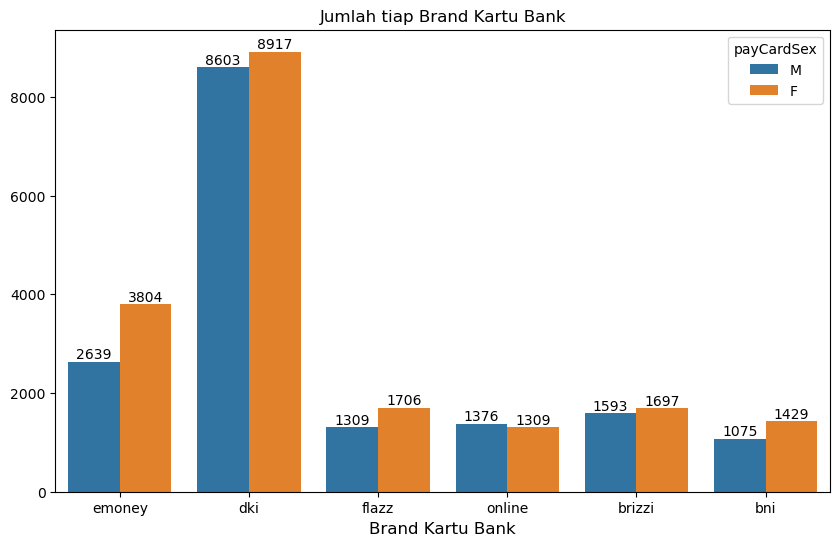

In [65]:
plt.figure(figsize=[10,6])

ax = sns.countplot(data=df2,
              x='payCardBank',
              hue='payCardSex')

for cont in ax.containers:
    ax.bar_label(cont, label_type='edge', fontsize=10)

plt.ylabel('')
plt.xlabel('Brand Kartu Bank', fontsize=12)

plt.title('Jumlah tiap Brand Kartu Bank')
plt.show()

Didapat `dki` merupakan jenis `payCardBank` yang paling banyak digunakan, serta juga didapat perbedaan antara lelaki dan perempuan dimana perempuan lebih banyak tetapi tidak menjadi penentu jumlah jenis `payCardBank`

### Melihat Demografik Tahun Lahir

In [66]:
df2.groupby('payCardBirthDate')['payCardBirthDate'].value_counts().reset_index()

,payCardBirthDate,count
0,1946,111
1,1947,16
2,1948,77
3,1949,8
4,1951,46
...,...,...
61,2008,816
62,2009,708
63,2010,707
64,2011,685


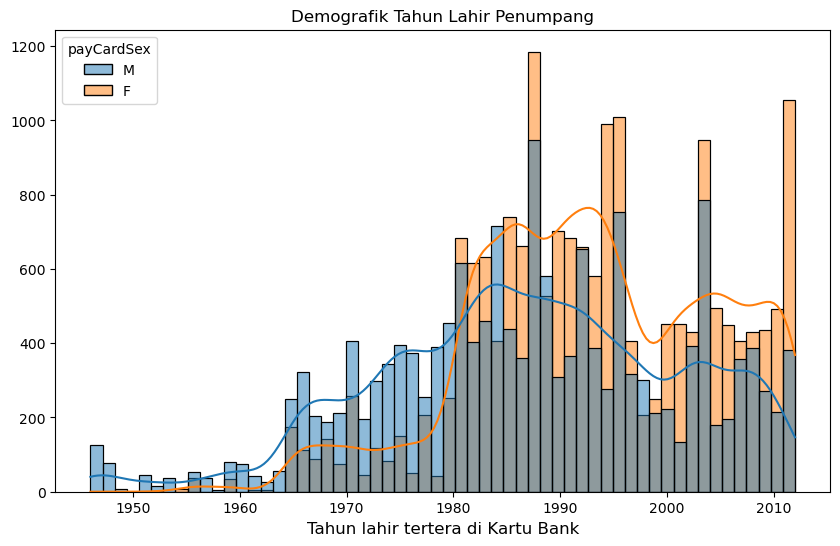

In [67]:
plt.figure(figsize=[10,6])

sns.histplot(data=df2,
              x='payCardBirthDate',
              hue='payCardSex',
              kde=True
              )

plt.ylabel('')
plt.xlabel('Tahun lahir tertera di Kartu Bank', fontsize=12)

plt.title('Demografik Tahun Lahir Penumpang')
plt.show()

- Pengguna Transjakarta melonjak dari yang kelahiran `1980` keatas 
- Ada penurunan sementara pada kelahiran `2000` sebelum stabil kembali, tapi ini perlu dilihat pada tahun-tahun kedepannya
- Lebih dari `2010` merupakan usia yang belum bisa menaiki Transjakarta sendiri sehingga tidak perlu diperhitungkan

### Koridor dan Halte Paling Ramai

In [68]:
df2.groupby('corridorName')['tapInStopsName'].value_counts().reset_index()

,corridorName,tapInStopsName,count
0,Andara - Stasiun Universitas Pancasila,Andara Margasatwa 4,37
1,Andara - Stasiun Universitas Pancasila,Sbr. Sekolah Islam Al Azhar Jagakarsa,33
2,Andara - Stasiun Universitas Pancasila,Sekolah Cita Buana,20
3,Andara - Stasiun Universitas Pancasila,St. Universitas Pancasila,20
4,Andara - Stasiun Universitas Pancasila,Jln. H. Terin Pangkalan Jati,19
...,...,...,...
3570,Universitas Indonesia - Lebak Bulus,RS Siloam,1
3571,Universitas Indonesia - Lebak Bulus,Ratu Prabu,1
3572,Universitas Indonesia - Lebak Bulus,St. Lenteng Agung 1,1
3573,Universitas Indonesia - Lebak Bulus,St. MRT Fatmawati,1


In [69]:
df2['corridorName'].value_counts().sort_values(ascending=False).reset_index().head(10)

,corridorName,count
0,Cibubur - Balai Kota,384
1,Ciputat - CSW,376
2,Harmoni - Jakarta International Stadium,333
3,Kampung Rambutan - Pondok Gede,327
4,Rusun Pondok Bambu - Walikota Jakarta Timur,323
5,Kebayoran Lama - Tanah Abang,321
6,Rusun Rawa Bebek - Kodamar,307
7,Pasar Minggu - Tanah Abang,300
8,BKN - Blok M,299
9,Kampung Rambutan - Pasar Rebo via Poncol,292


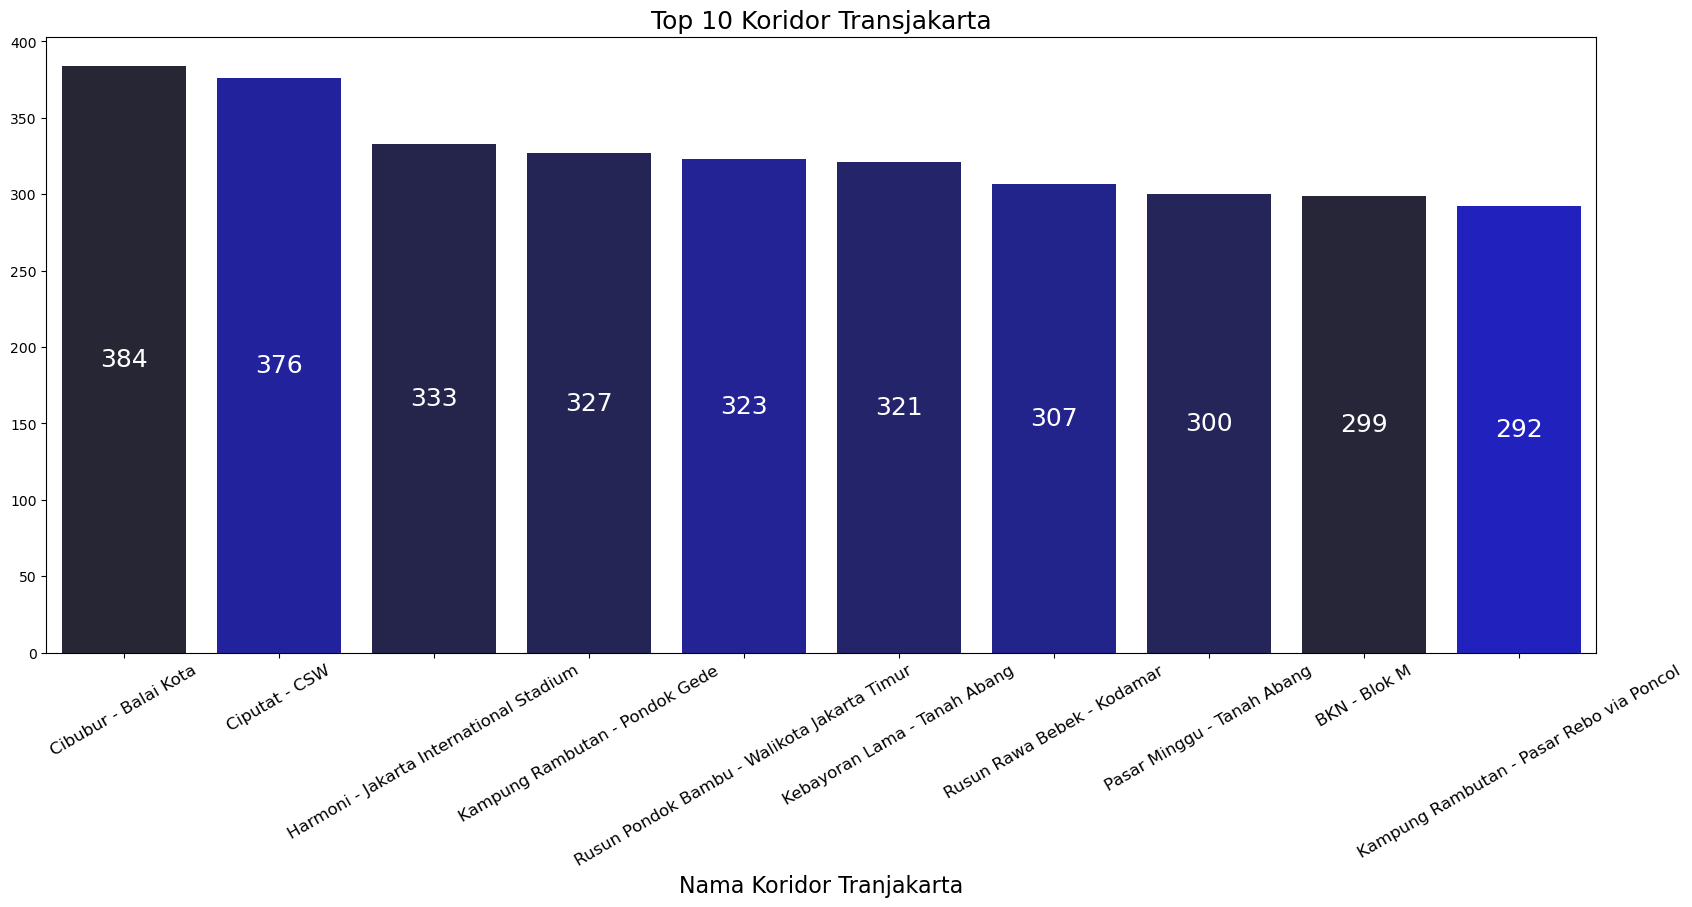

In [70]:
plt.figure(figsize=[20,8])

ax= sns.countplot(data=df2,
              x='corridorName',
              hue='corridorName',
              order=df2['corridorName'].value_counts().iloc[:10].index,
              color='blue')

for cont in ax.containers:
    ax.bar_label(cont, label_type='center', fontsize=18, color='white')

plt.title('Top 10 Koridor Transjakarta', fontsize=18)
plt.xticks(rotation=30, fontsize=12)
plt.ylabel('')
plt.xlabel('Nama Koridor Tranjakarta', fontsize=16)
plt.show()

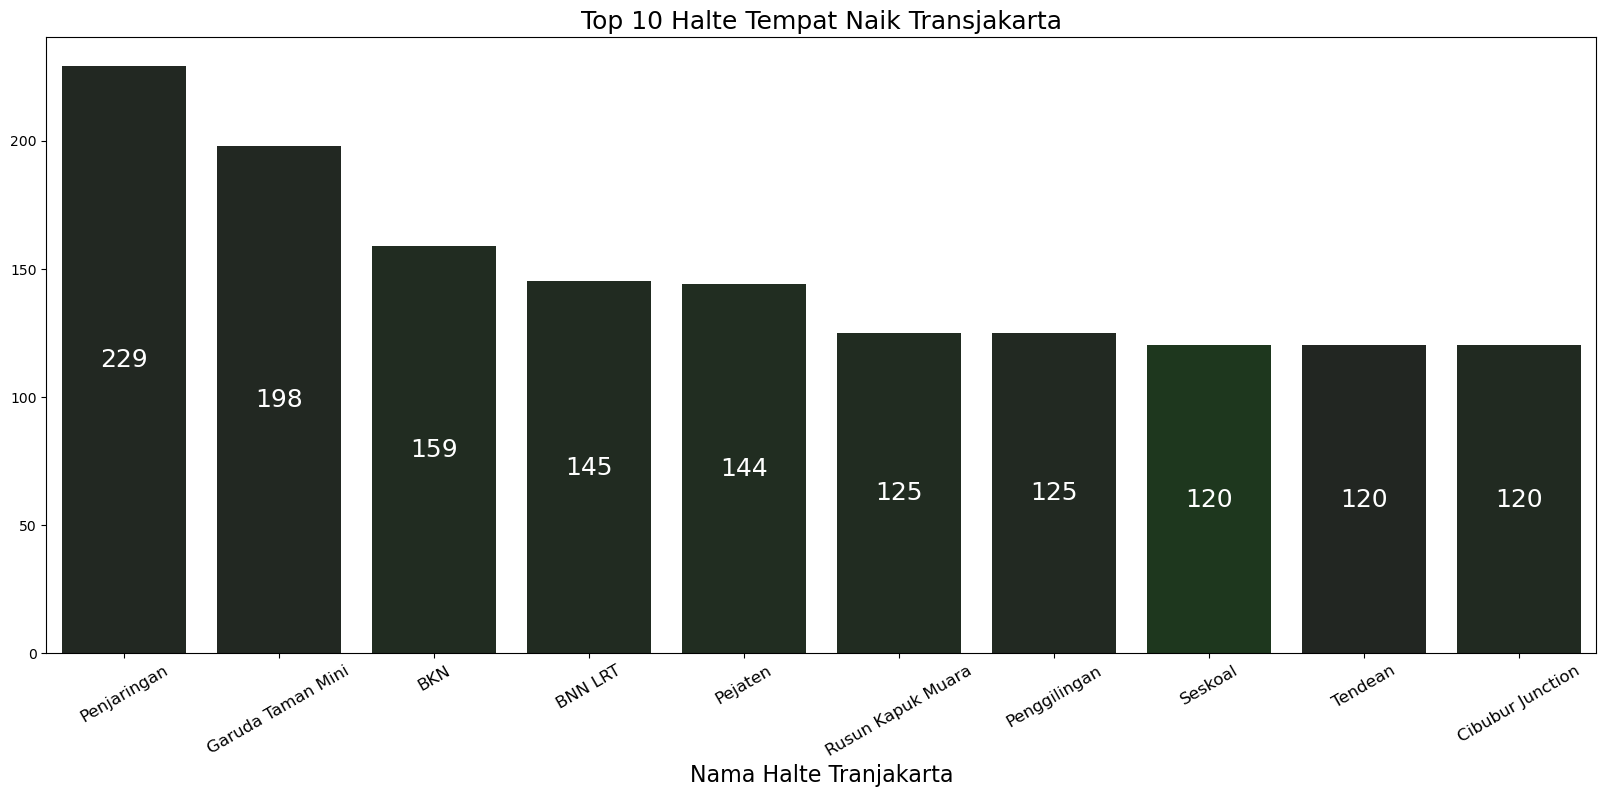

In [71]:
plt.figure(figsize=[20,8])

ax= sns.countplot(data=df2,
              x='tapInStopsName',
              hue='tapInStopsName',
              order=df2['tapInStopsName'].value_counts().iloc[:10].index,
              color='green')

for cont in ax.containers:
    ax.bar_label(cont, label_type='center', fontsize=18, color='white')

plt.title('Top 10 Halte Tempat Naik Transjakarta', fontsize=18)
plt.xticks(rotation=30, fontsize=12)
plt.ylabel('')
plt.xlabel('Nama Halte Tranjakarta', fontsize=16)
plt.show()

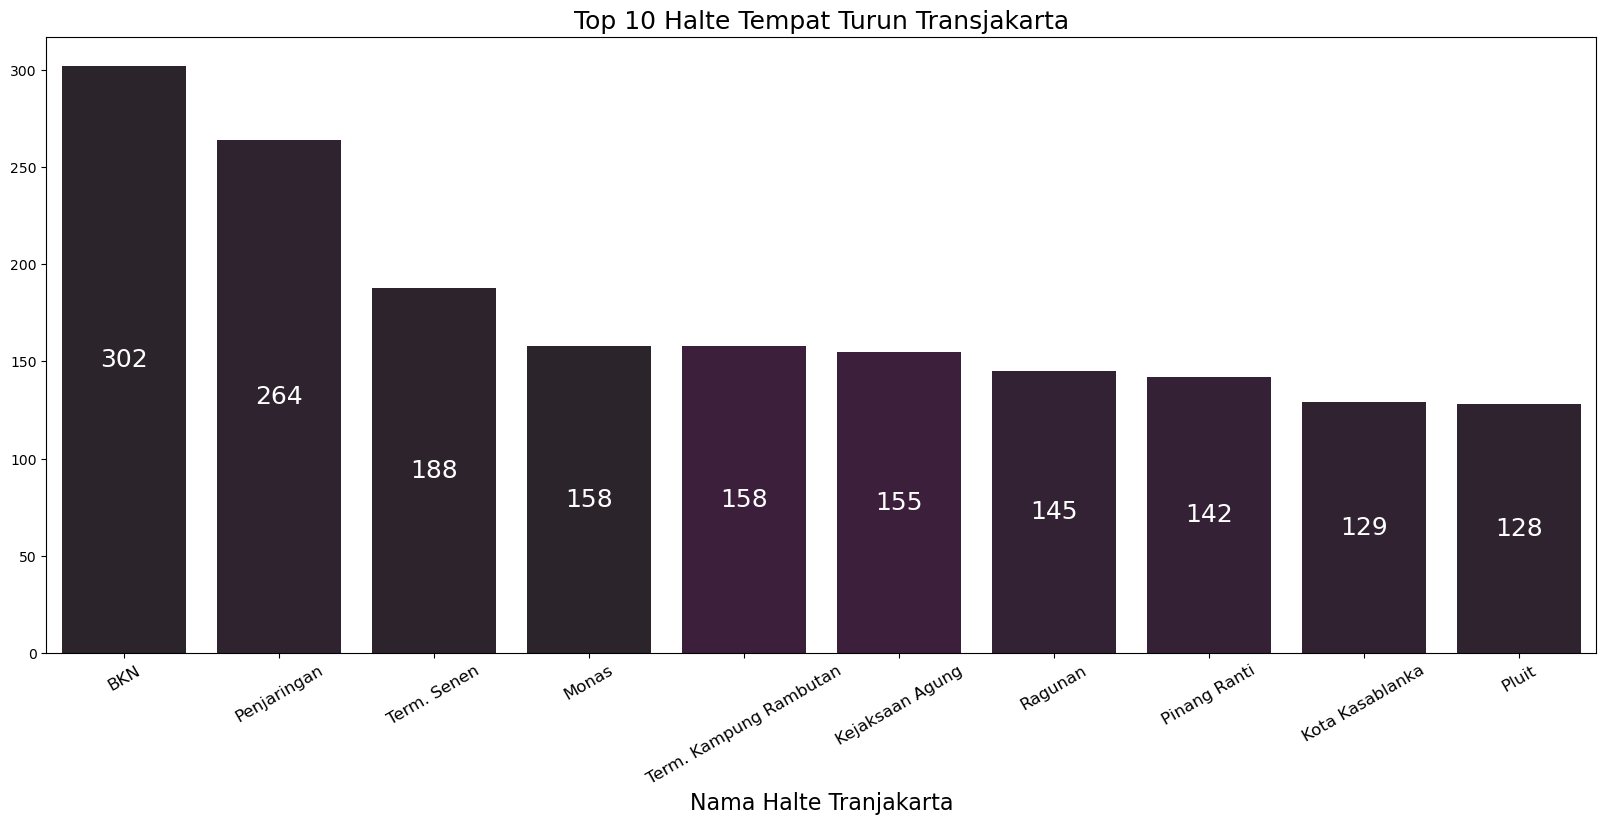

In [72]:
plt.figure(figsize=[20,8])

ax= sns.countplot(data=df2,
              x='tapOutStopsName',
              hue='tapOutStopsName',
              order=df2['tapOutStopsName'].value_counts().iloc[:10].index,
              color='purple')

for cont in ax.containers:
    ax.bar_label(cont, label_type='center', fontsize=18, color='white')

plt.title('Top 10 Halte Tempat Turun Transjakarta', fontsize=18)
plt.xticks(rotation=30, fontsize=12)
plt.ylabel('')
plt.xlabel('Nama Halte Tranjakarta', fontsize=16)
plt.show()

In [73]:
display(df[(df['corridorName'] == 'Cibubur - Balai Kota') & (df['tapInStopsName'] == 'Penjaringan')], df[(df['corridorName'] == 'Cibubur - Balai Kota') & (df['tapOutStopsName'] == 'BKN')])

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount


- Koridor dengan trafik penumpang terbanyak berada pada rute koridor `Cibubur - Balai Kota`
- Didapat Halte teramai baik tempat naik dan turun bukan di rute koridor `Cibubur - Balai Kota`
- Artinya rute koridor umumnya bukan penentu tujuan dari penumpang Tranjakarta, melainkan Haltenya itu sendiri
- Halte tempat naik paling ramai merupakan `Penjaringan`, halte yang sama juga merupakan halte tempat turun kedua paling ramai
- Bisa dibilang `Penjaringan` merupakan halte paling ramai secara kesuluruhan
- Halte tempat turun paling ramai merupakan `BKN`, halte yang sama juga merupakan halte tempat naik ketiga paling ramai

Mendapatkan value `Year`, `Month`, `Day`, `Hour`, dari `tapInTime`

In [74]:
time_list = []
for t in df2['tapInTime']:
    dt = time(t)
    time_list.append([dt[0], dt[1], dt[2], dt[3]])

df_t = pd.DataFrame(data=time_list,
                    columns=['Year', 'Month', 'Day', 'Hour'])

display_side_by_side(df_t.head(), df_t.tail())

,Year,Month,Day,Hour
0,2023,4,3,5
1,2023,4,3,5
2,2023,4,3,5
3,2023,4,3,5
4,2023,4,3,6
,Year,Month,Day,Hour
35452,2023,4,21,18
35453,2023,4,18,21
35454,2023,4,4,10
35455,2023,4,15,19


### Jumlah Penumpang Transjakarta serta rata-rata berdasarkan Weekday dan Weekend

In [75]:
# Mendapatkan weekday dan weekend
weekend = [1,2,8,9,15,16,22,23,29,30]
weekday = []
for d in df_t['Day'].sort_values().unique():
    if d in weekend:
        continue
    weekday.append(d)  
d_t = df_t[df_t['Day'].isin(weekday)].copy()
w_t = df_t[df_t['Day'].isin(weekend)].copy()

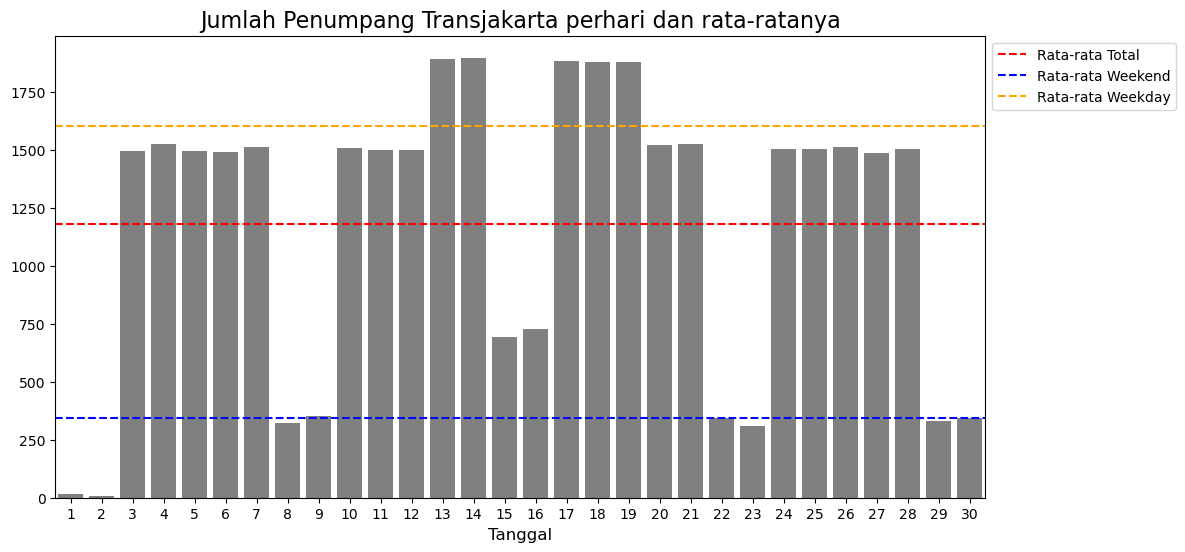

In [76]:
plt.figure(figsize=[12,6])

sns.countplot(data=df_t,
              x='Day',
              color='gray')

plt.axhline(y=df_t['Day'].value_counts().mean(), color='red', linestyle='--')
plt.axhline(y=w_t['Day'].value_counts().mean(), color='blue', linestyle='--')
plt.axhline(y=d_t['Day'].value_counts().mean(), color='orange', linestyle='--')
label = ['Rata-rata Total', 'Rata-rata Weekend', 'Rata-rata Weekday']
plt.legend(label, loc=2, bbox_to_anchor=(1, 1))

plt.title('Jumlah Penumpang Transjakarta perhari dan rata-ratanya', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('')


plt.show()

- Rata-rata secara total mendekati 1250
- Rata-rata pada weekday melebihi 1500
- Rata-rata pada weekend melebihi 250

### Proporsi Penumpang Berdasarkan Jam

In [77]:
px.sunburst(df_t,path=['Hour'],color='Hour', title='Proporsi Penumpang total per Jam')


In [78]:
px.sunburst(df_t,path=['Day','Hour'],color='Hour', title='Proporsi Penumpang tiap Hari per Jam (Interactive Model)')


In [119]:
px.sunburst(d_t, path=['Hour'], color='Hour', title='Proporsi Penumpang per Jam pada Weekday')

In [79]:
fig = px.sunburst(w_t.sort_values(by=['Hour']), path=['Hour'], color='Hour', title='Proporsi Penumpang per Jam pada Weekend')
fig.update_traces(sort=False)
fig.show()

- Proporsi penumpang pada weekday banyak dari pukul 5 hingga 7 untuk pagi hari dengan pukul 16 hingga 17 untuk sore hari
- Proporsi penumpang pada weekend tersebar rata pada tiap jam operasional
- Dari ini dapat direkomendasikan pelayan dimaksimalkan pada jam operasional ramai untuk weekday
- Sementara untuk weekend, karena tiap jam operasional memiliki proporsi rata, ini menjadi indikasi kalau layanan Transjakarta masih efektif dan laku pada waktu diluar kebutuhan kerja

### Melihat Halte paling ramai berdasarkan koridor paling ramai

In [80]:
top_koridor = df2['corridorName'].value_counts().iloc[:5].reset_index().iloc[:,0]
df_kor = df2[df2['corridorName'].isin(top_koridor)][['corridorName', 'tapInStopsName', 'tapOutStopsName']]
display(df_kor.head(3), df_kor.tail(3),df_kor['corridorName'].unique())

,corridorName,tapInStopsName,tapOutStopsName
5,Cibubur - Balai Kota,Benhil 3,Grand Sahid
37,Harmoni - Jakarta International Stadium,Kemayoran Landas Pacu Timur,Pecenongan
56,Kampung Rambutan - Pondok Gede,Jln. Kramat Lubang Buaya,Pertigaan Cedang 1


,corridorName,tapInStopsName,tapOutStopsName
37872,Rusun Pondok Bambu - Walikota Jakarta Timur,Duren Sawit,Baladewa Residence
37873,Rusun Pondok Bambu - Walikota Jakarta Timur,Rusun Pondok Bambu,Wisma Atlet Radin Inten
37897,Cibubur - Balai Kota,Plaza Sentral,Buperta Cibubur


array(['Cibubur - Balai Kota', 'Harmoni - Jakarta International Stadium',
       'Kampung Rambutan - Pondok Gede',
       'Rusun Pondok Bambu - Walikota Jakarta Timur', 'Ciputat - CSW'],
      dtype=object)

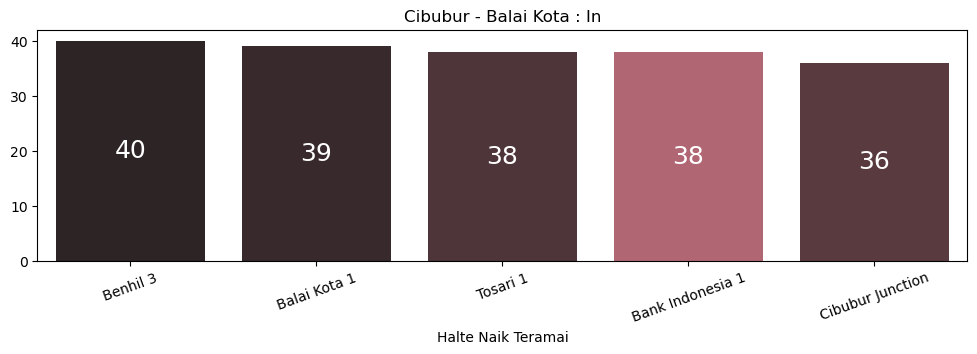

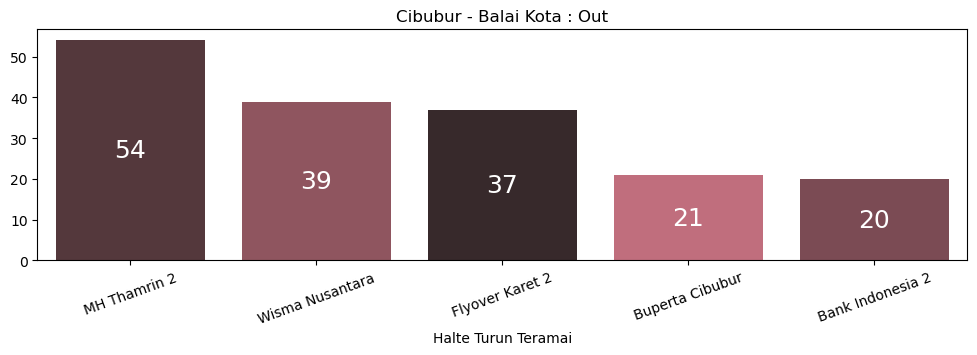

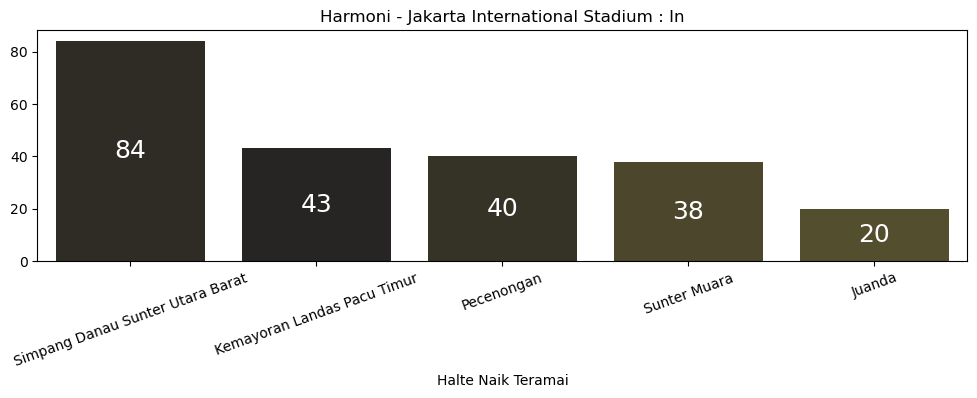

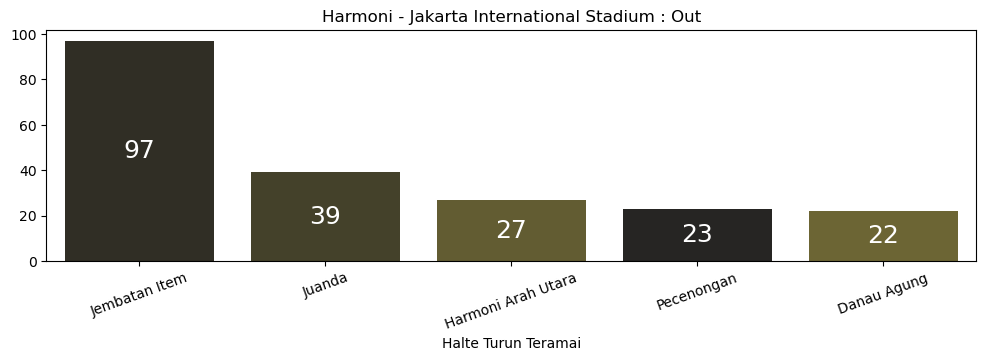

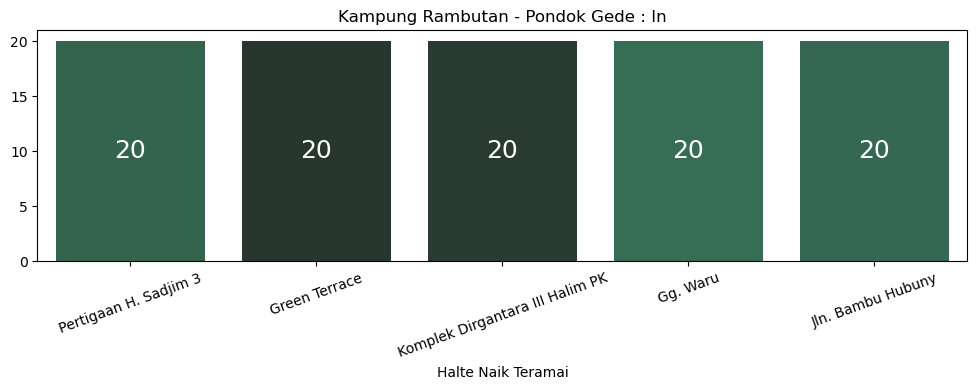

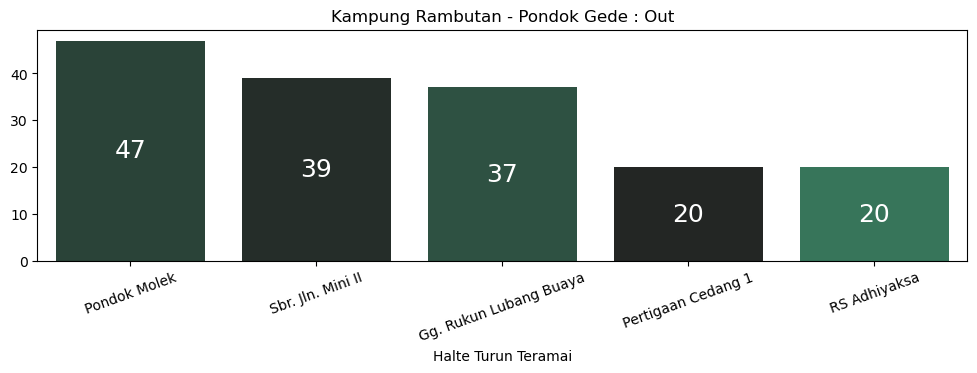

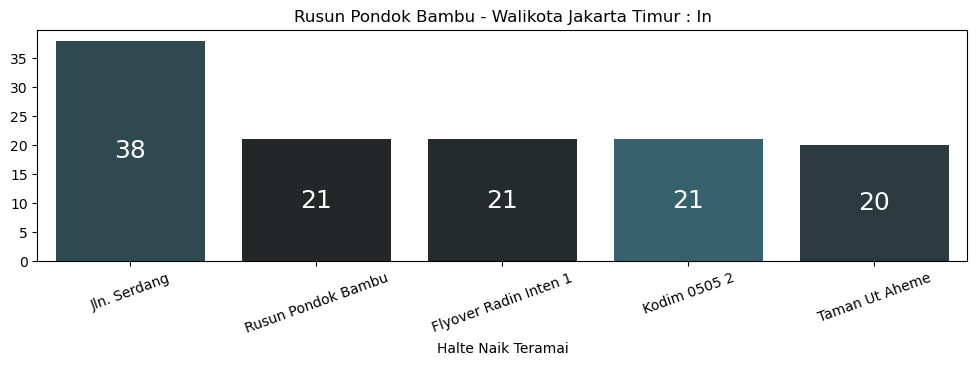

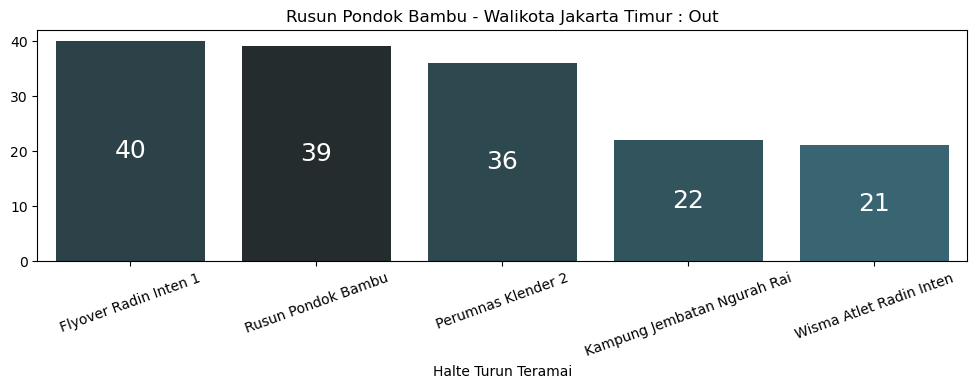

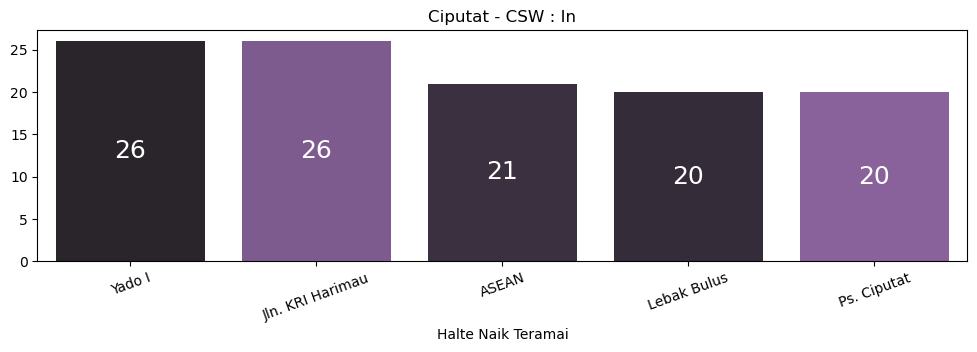

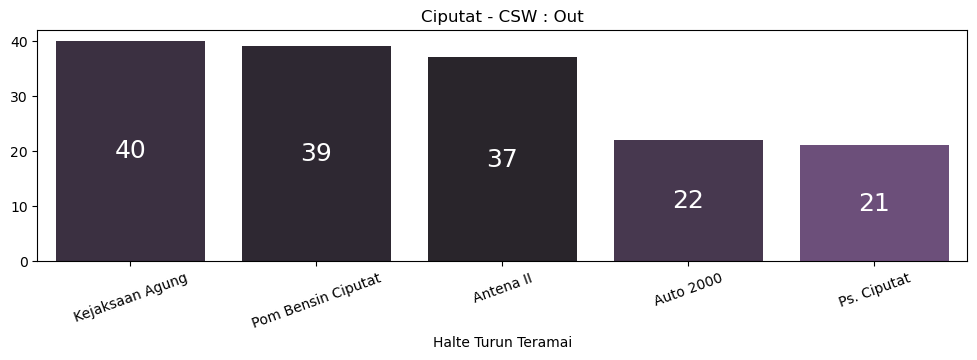

In [81]:
palette = iter(sns.husl_palette(len(df_kor['corridorName'].unique())))
for koridor in df_kor['corridorName'].unique():
    df_korT = df_kor[df_kor['corridorName'] == koridor]
    color = next(palette)
    for i in ['tapInStopsName', 'tapOutStopsName']:
        plt.figure(figsize=[12,3])
        fig = sns.countplot(data=df_korT,
                            x=i,
                            hue=i,
                            order=df_korT[i].value_counts().iloc[:5].index,
                            color=color)
        for cont in fig.containers:
            fig.bar_label(cont, label_type='center', fontsize=18,color='white')
        
        if 'In' in i:
            plt.xlabel('Halte Naik Teramai')
            xl = 'In'
        elif 'Out' in i:
            plt.xlabel('Halte Turun Teramai')
            xl = 'Out'

        plt.xticks(rotation=20)
        plt.ylabel('')
        plt.title(f'{koridor} : {xl}')
        plt.show()  
    

Didapat dari seluruh koridor bahwa halte tempat turun selalu lebih banyak dari halte naik, sekali lagi menunjukkan kalau koridor bukan penentu tujuan yang paling utama

## Save Dataframe bersih ke csv baru

In [82]:
df_clean.to_csv('Transjakarta_clean.csv')